In [1]:
pip install opencv-python

In [2]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
##Data Augmentation to address overfitting

#this works by trying to generate new samples(this can include taking a small sample and dupicating it) or in the case of 
#image classification you can appy some transformation to a small sample like
#horizintal flip,contrast,rotation,zoom ....
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
dataset_url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'


In [6]:
##Transfer learning
#here we use a pre-trained model and re-train it again for a new problem
#########the above i will need to revisit the tutorials to write the codes now i have the modules already installed succeesfully

In [7]:
#image classification vs object detection vs image segmentation

In [8]:
#####YOLO algorithm
#

##Object detection using YOLO 

## Recurrent Neural Network (RNN) 

In [46]:
##this is mainly used for (NLP) natural language proccessing tasks
#CNN is used for image processing

In [47]:
#vanishing and exploding gradients
#when you  have a very low gradient ,your learning process will be slow(vanishing gradients)
#we special types of RNN which adrresses and solves the issue of short memory problem
#i.e GRU(Gated Recurrent Units) and LSTM(Long Short Term Memory)
#Bidirectional RNN

In [48]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [49]:
reviews=[
    'nice food',
    'amazing restaurant',
    'too good',
    'just loved it',
    'will go again',
    'horrible food',g
    'never go there',
    'poor service',
    'poor quality',
    'needs improvement'
]
sentiment=np.array([1,1,1,1,1,0,0,0,0,0])

In [50]:
##we will first convert these reviews into one_hot vector

In [51]:
one_hot('amazing_restaurant',50)

[35, 6]

In [52]:
vocab_size=30
encoded_reviews=[one_hot(d,vocab_size) for d in reviews]
print(encoded_reviews)

[[8, 4], [9, 25], [8, 23], [7, 20, 13], [3, 15, 27], [6, 4], [15, 15, 20], [20, 6], [20, 11], [17, 25]]


In [53]:
encoded_reviews

[[8, 4],
 [9, 25],
 [8, 23],
 [7, 20, 13],
 [3, 15, 27],
 [6, 4],
 [15, 15, 20],
 [20, 6],
 [20, 11],
 [17, 25]]

In [54]:
##now we need to do padding ,i.e some terms have 2 values n others with 3,so we need to append zero to those 
#text with 2 values to attain a standard 3 value format

In [55]:
max_length=3#can do 3 or 4
padded_reviews=pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
print(padded_reviews)

[[ 8  4  0]
 [ 9 25  0]
 [ 8 23  0]
 [ 7 20 13]
 [ 3 15 27]
 [ 6  4  0]
 [15 15 20]
 [20  6  0]
 [20 11  0]
 [17 25  0]]


In [56]:
embeded_vector_size=4

model=Sequential()##the first layer is an embedding layer
model.add(Embedding(vocab_size,embeded_vector_size,input_length=max_length,name='embedding'))
#second layer is flatten layer
model.add(Flatten())
#next layer is one layer sigmoid activation funtion
model.add(Dense(1,activation='sigmoid'))

In [57]:
X=padded_reviews
y=sentiment

In [58]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3, 4)              120       
_________________________________________________________________
flatten_3 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


now we gonna train our model

In [59]:
model.fit(X,y,epochs=50,verbose=0)

In [60]:
loss,accuracy=model.evaluate(X,y)
accuracy

1/1 [==============================] - 0s 308ms/step - loss: 0.6399 - accuracy: 1.0000


1.0

In [61]:
weights=model.get_layer('embedding').get_weights()[0]
len(weights)

30

In [62]:
weights[8]

array([-0.03325002, -0.06556621, -0.02027671,  0.08029708], dtype=float32)

In [44]:
weights[9]

array([-0.08811332, -0.03716795,  0.06202875, -0.06848854], dtype=float32)

Word2Vec

In [63]:
#this is a method usefull in converting words to a vector

In [1]:
#####DAta Augmentation
#this is used to control overfitting to improve the models performance
#it can include,taking some sample and duplicating it for ANN, or in the case of
#CNN,taking some sample pictures and applying some effects such as zoom,crop,enlarge,horizontal flip
#.......this i will revisit the tutorial

###now im gonna look at this data augmentation class to learn alot more

##first i will import the neccesary important libraries to use in this topic

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [2]:
dataset_url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
##we are downloading the flowers dataset from google
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url, cache_dir='C:\\Users\sojore\Documents',untar=True)
#so the above code means we saving the data into a folder called flower_phots ,n the cache_dir is the directory i want ot saved
#untar=True ,means that since we are getting a zip file from the download,then we unzip it using this function(untar)

In [3]:
data_dir

'C:\\Users\\sojore\\Documents\\datasets\\flower_photos'

In [4]:
##next now im gonna convert my data_dir into a pathlib which makes it easier to access

In [5]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos')

In [6]:
##so we can do the following,meaning that,give me all the images which has an extension jpg
list(data_dir.glob('*/*.jpg'))

[WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 Wi

In [7]:
##so also i can get the length(count) of all the images as follows
len(list(data_dir.glob('*/*.jpg')))

3669

In [8]:
##so if i wanna get only the rose images i do the following
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

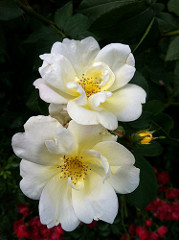

In [9]:
##so we wanna show all the above images using the pillow module
#we use the command below to show images in PIL
PIL.Image.open(str(roses[0]))

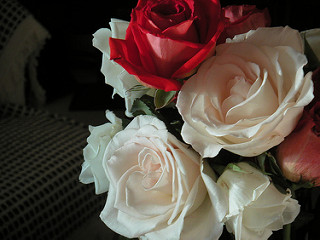

In [10]:
PIL.Image.open(str(roses[1]))

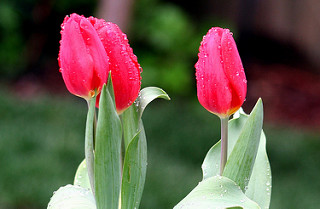

In [11]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(tulips[0])

In [12]:
#now i will create a flower dictionary containing all paths to different types of flowers
#this will give all the paths of the flower images
333333

In [13]:
flower_images_dict['roses']

[WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),


In [14]:
##i wanna also have a labels dictionary as below

In [15]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [16]:
#we can use the open cv module to read these files into an open cv object(sort of like a numpy array)

In [17]:
str(flower_images_dict['roses'][0])

'C:\\Users\\sojore\\Documents\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [18]:
img=cv2.imread(str(flower_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [19]:
img.shape

(240, 179, 3)

In [20]:
#now we will use open cv inorder to resize our images to some standard size
#this is because some of the images have diffent dimensions
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [21]:
X,y=[],[]

for flower_name,images in flower_images_dict.items():
    print(flower_name)
    print(len(images))

roses
640
daisy
1
dandelion
898
sunflowers
0
tulips
799


In [22]:
X,y=[],[]

for flower_name,images in flower_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))##we resize because ML models works with images with one dimension
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])#this code i will get the number for each flower name
        

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-vi271kac\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [23]:
##now i will convert my X,y into a simple numpy array

In [24]:
X=np.array(X)
y=np.array(y)

In [25]:
X.shape

(640, 180, 180, 3)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [27]:
len(X_train)

480

In [28]:
len(X_test)

160

In [29]:
##now we need to do scaling

In [30]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [31]:
X_train_scaled[0]

array([[[0.56470588, 0.68235294, 0.65490196],
        [0.51764706, 0.67058824, 0.66666667],
        [0.47843137, 0.65098039, 0.6627451 ],
        ...,
        [0.        , 0.        , 0.16862745],
        [0.01176471, 0.00392157, 0.19215686],
        [0.01960784, 0.        , 0.24705882]],

       [[0.51764706, 0.68235294, 0.66666667],
        [0.48627451, 0.63921569, 0.63137255],
        [0.37254902, 0.58431373, 0.57647059],
        ...,
        [0.        , 0.        , 0.21568627],
        [0.02352941, 0.        , 0.24705882],
        [0.04313725, 0.        , 0.30588235]],

       [[0.45882353, 0.63529412, 0.63529412],
        [0.37647059, 0.57647059, 0.56078431],
        [0.34901961, 0.54509804, 0.53333333],
        ...,
        [0.03529412, 0.        , 0.25882353],
        [0.02352941, 0.        , 0.29411765],
        [0.05098039, 0.        , 0.35294118]],

       ...,

       [[0.40392157, 0.4745098 , 0.51372549],
        [0.4745098 , 0.74509804, 0.83529412],
        [0.65098039, 0

In [32]:
##now we are ready to build our model using CNN

In [33]:
num_classes=5
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    #add Dense network
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
15/15 [==============================] - 80s 3s/step - loss: 0.1023 - accuracy: 0.9542
Epoch 2/5
15/15 [==============================] - 44s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
15/15 [==============================] - 37s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
15/15 [==============================] - 56s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
15/15 [==============================] - 51s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000


In [34]:
model.evaluate(X_test_scaled,y_test)

5/5 [==============================] - 14s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [35]:
predictions=model.predict(X_test_scaled)
predictions

array([[ 128.59157 ,  -70.90685 ,  -60.27626 ,  -49.342373,  -56.842335],
       [ 131.66782 ,  -72.466835,  -61.93134 ,  -50.586918,  -58.08159 ],
       [ 189.03491 , -104.255806,  -88.76334 ,  -72.53028 ,  -83.3494  ],
       [ 114.675644,  -63.15501 ,  -53.87828 ,  -44.201702,  -50.515858],
       [ 141.8209  ,  -77.966225,  -66.33512 ,  -54.248135,  -62.226936],
       [ 161.11093 ,  -88.93744 ,  -75.96825 ,  -61.868214,  -71.150475],
       [ 148.28502 ,  -81.591866,  -69.51573 ,  -57.032772,  -65.36686 ],
       [ 137.2976  ,  -75.37362 ,  -64.35722 ,  -52.89198 ,  -60.244064],
       [ 115.067566,  -63.1642  ,  -53.698025,  -44.05536 ,  -50.23253 ],
       [ 111.786545,  -61.590397,  -52.24174 ,  -42.674213,  -48.97436 ],
       [ 136.03662 ,  -74.86326 ,  -63.70754 ,  -51.909126,  -59.794865],
       [ 113.218445,  -61.764034,  -52.21092 ,  -43.20258 ,  -48.993393],
       [  87.86398 ,  -48.422462,  -41.38061 ,  -33.72574 ,  -38.752014],
       [ 116.33652 ,  -64.02721 ,  -54

In [36]:
#so now if we wanna convert out predictions into a probability score we do the following
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 0., 0.], dtype=float32)>

In [37]:
np.argmax(score)

0

In [38]:
y_test[0] #for our 1st value it got it correctly despite the models low accuracy,,n this happened because of overfitting
#so we can use data augmentation to control this overfitting

0

In [39]:
#####so next up we gonna use data augmentation to control overfiting

In [48]:
data_augmentation=keras.Sequential([
    #we gonna start with a random zoom
    layers.experimental.preprocessing.RandomZoom(0.9),
])

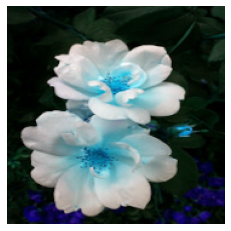

In [49]:
plt.axis('off')
plt.imshow(X[0])

<tf.Tensor: shape=(180, 180, 3), dtype=uint8, numpy=
array([[[  9,  19,   6],
        [  3,  15,   3],
        [  0,  10,   1],
        ...,
        [  3,  14,   4],
        [  2,  12,   2],
        [  1,   9,   0]],

       [[  6,  17,   4],
        [  5,  16,   5],
        [  2,  12,   3],
        ...,
        [  0,  10,   0],
        [  1,   9,   0],
        [  2,  11,   1]],

       [[  2,  14,   2],
        [  3,  14,   3],
        [  4,  14,   5],
        ...,
        [  0,   8,   0],
        [  0,   8,   0],
        [  2,  10,   2]],

       ...,

       [[148, 152, 151],
        [158, 158, 157],
        [165, 161, 160],
        ...,
        [  6,  24,   7],
        [  8,  27,  10],
        [ 13,  33,  16]],

       [[161, 162, 161],
        [174, 172, 171],
        [174, 170, 170],
        ...,
        [  6,  24,   7],
        [ 10,  29,  12],
        [  8,  27,  10]],

       [[178, 181, 180],
        [179, 180, 179],
        [172, 173, 172],
        ...,
        [ 13,  31,  1

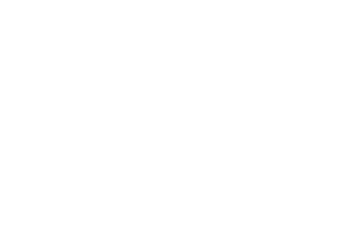

In [50]:
plt.axis('off')##now i wanna apply transformation on this image
data_augmentation(X)[0]

In [51]:
#we do the following to convert the above into a numpy array

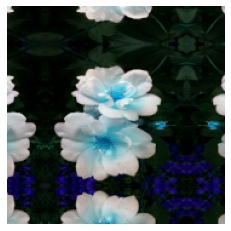

In [52]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [53]:
data_augmentation=keras.Sequential([
    #we can also do image contrast or also rotation
    layers.experimental.preprocessing.RandomContrast(0.9),
])

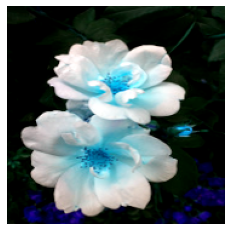

In [54]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [59]:
X_train.shape

(480, 180, 180, 3)

In [55]:
##now we gonna apply this data augmentation to generate new samples to better train our model

In [64]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',
                                                input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

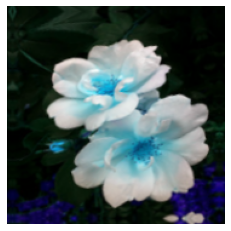

In [65]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [66]:
##now i run the same model for CNN bu i supply data_augmentation as first layer as below to see its perfomance

In [68]:
num_classes=5
model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    #add Dense network
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
15/15 [==============================] - 96s 4s/step - loss: 0.1058 - accuracy: 0.9542
Epoch 2/5
15/15 [==============================] - 52s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
15/15 [==============================] - 63s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
15/15 [==============================] - 54s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
15/15 [==============================] - 58s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000


In [69]:
model.evaluate(X_test_scaled,y_test)##this will  definately improve the perfomance of the model on the testing dataset

5/5 [==============================] - 11s 717ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [70]:
##transer learning we take a pre-trained model n then we try to retrain it to match our needs

In [71]:
##now we gonna use a different trained model for a different purpose but change it to fit our  needs to classify our flower dataset

In [73]:
pip install tensorflow_hub

In [74]:
#importing important libraries
import numpy as np
import os
import cv2
import PIL.Image as Image
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [75]:
IMAGE_SHAPE=(224,224)##when you do like IMAGE_SHAPE+(3,) it will give you a 3-dim array (224,224,3)
classifier=tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=IMAGE_SHAPE+(3,))
])

In [77]:
#downloading the flower dataset code
dataset_url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url, cache_dir='C:\\Users\sojore\Documents',untar=True)

In [78]:
data_dir

'C:\\Users\\sojore\\Documents\\datasets\\flower_photos'

In [79]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos')

In [80]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [82]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3669

In [83]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

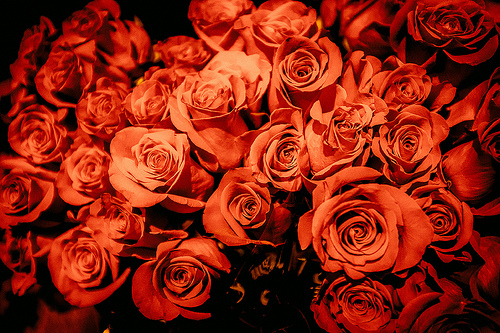

In [84]:
Image.open(str(roses[2]))

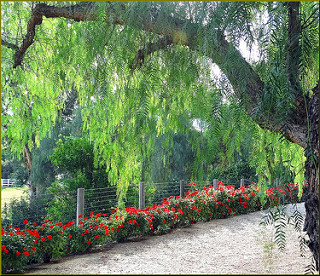

In [85]:
Image.open(str(roses[5]))

In [86]:
tulips=list(data_dir.glob('tulips/*'))
tulips[:5]

[WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

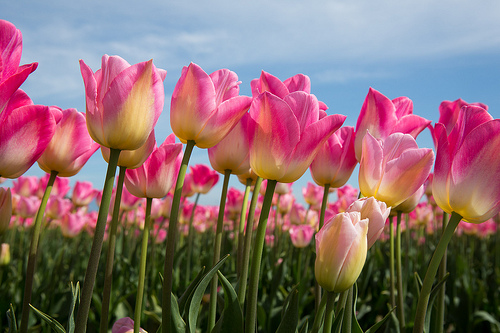

In [88]:
Image.open(str(tulips[3]))

In [89]:

flower_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [90]:
flower_images_dict['tulips']

[WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/tulips/10164073235_f29931d91e.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/tulips/10686568196_b1915544a8.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/tulips/107693873_86021ac4ea_n.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/tulips/10791227_7168491604.jpg'),
 WindowsPath('C:/Users/sojore/Documents/datasets/flower_photos/tulips/10995953955_089572caf0.jpg'),
 

In [91]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [92]:
str(flower_images_dict['roses'][0])

'C:\\Users\\sojore\\Documents\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [93]:
#we can now read this in to open cv module

In [94]:
img=cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [95]:
#i wanna resize all images to have the same size

In [96]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [98]:
X,y=[],[]

for flower_name,images in flower_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(224,224))##we resize because ML models works with images with one dimension
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])#this code i will get the number for each flower name
        

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-vi271kac\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [99]:
X[0]

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 16,  7],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 8, 22, 14],
        [ 8, 22, 14],
        [ 7, 21, 14],
        ...,
        [21, 47, 31],
        [24, 49, 34],
        [25, 51, 35]],

       [[12, 22, 15],
        [12, 22, 15],
        [11, 22, 14],
        ...,
        [21, 43, 31],
        [24, 46, 33],
        [26, 48, 36]],

       ...,

       [[17, 29, 25],
        [14, 25, 20],
        [13, 22, 15],
        ...,
        [ 2, 11,  2],
        [ 0,  7,  1],
        [ 0,  4,  0]],

       [[19, 30, 28],
        [18, 28, 25],
        [16, 25, 19],
        ...,
        [ 2, 10,  2],
        [ 1,  8,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [15, 23, 22],
        [19, 27, 24],
        ...,
        [ 1, 11,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [101]:
X=np.array(X)
y=np.array(y)

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [103]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

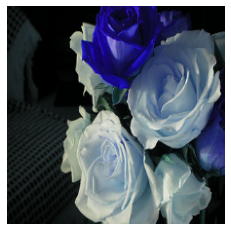

In [104]:
#i wanna use the above pre-trained model
plt.axis('off')
plt.imshow(X[1])

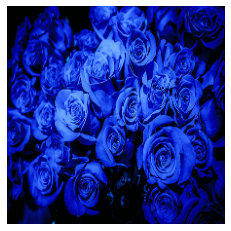

In [105]:
plt.axis('off')
plt.imshow(X[2])

In [108]:
predicted=classifier.predict(np.array([X[0],X[1],X[2]]))
predicted=np.argmax(predicted,axis=1)
predicted

array([795, 880, 795], dtype=int64)

In [110]:
#image_labels[795]##this will wrongly predict the flower

In [112]:
feature_extractor_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
#so this gives the same exact model as the classifier except the last layer
pretrained_model_without_top_layer=hub.KerasLayer(
    feature_extractor_model,input_shape=(224,224,3),trainable=False
)

In [113]:
##now i can create my model as below
num_of_flowers=5

model=tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)##here am using the pre-trained model and adding one more Dense layer to the model
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [114]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
model.fit(X_train_scaled,y_train,epochs=2)

Epoch 1/2
15/15 [==============================] - 126s 4s/step - loss: 0.2702 - acc: 0.9062
Epoch 2/2
15/15 [==============================] - 63s 4s/step - loss: 6.9812e-04 - acc: 1.0000


In [115]:
##using a pretrained model and then training it to do our classification achives greatter accuracy by running only fewer epochs as compared to running the same model from scratch

In [116]:
model.evaluate(X_test_scaled,y_test)

5/5 [==============================] - 26s 3s/step - loss: 3.7197e-04 - acc: 1.0000


[0.0003719705273397267, 1.0]

In [117]:
###TY.GOD